In [3]:
## Import required packages
import pyfolio as pf
import yfinance as yf
import pandas as pd

In [21]:
## Define list of tickers and weighting in portfolio
tickers = ['CSU.TO', 'ZETA', 'MDB', 'OKTA', 'FOUR', 'UNH', 'DEO', 'VHI.TO', 'PYPL', 'MELI', 'BN']
weights = pd.Series([0.1222, 0.1101, 0.1042, 0.0942, 0.0683, 0.1171, 0.0753, 0.067, 0.0864, 0.0742, 0.0811], index=tickers)

weights

CSU.TO    0.1222
ZETA      0.1101
MDB       0.1042
OKTA      0.0942
FOUR      0.0683
UNH       0.1171
DEO       0.0753
VHI.TO    0.0670
PYPL      0.0864
MELI      0.0742
BN        0.0811
dtype: float64

In [22]:
## Get yahoo finance data per ticker
prices = None

for t in tickers:
    h = yf.Ticker(t).history('max')[['Close']].rename(columns={'Close': t})
    prices = h if prices is None else prices.join(h, how='inner')

In [23]:
## Summarise into weighted return value
asset_ret = prices.pct_change().dropna()
returns = asset_ret.mul(weights).sum(axis=1)

In [24]:
## Ticker to benchmark against
bench = yf.Ticker('SPY').history('max')
bench_returns = bench.Close.pct_change()

## Align
returns, bench_returns = returns.align(bench_returns, join='inner')

/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.183%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '480.623%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,39.64,2021-11-08,2022-06-16,2024-01-22,576
1,24.76,2024-12-04,2025-04-08,NaT,NaN
2,10.30,2024-05-21,2024-06-20,2024-07-16,41
3,9.79,2024-11-11,2024-11-15,2024-12-04,18
4,7.24,2024-03-01,2024-04-15,2024-05-07,47


/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:850: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_value=is_cum_returns[-1],
/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:850: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_value=is_cum_returns[-1],
/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/matplotlib/dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')
/Users/morganla

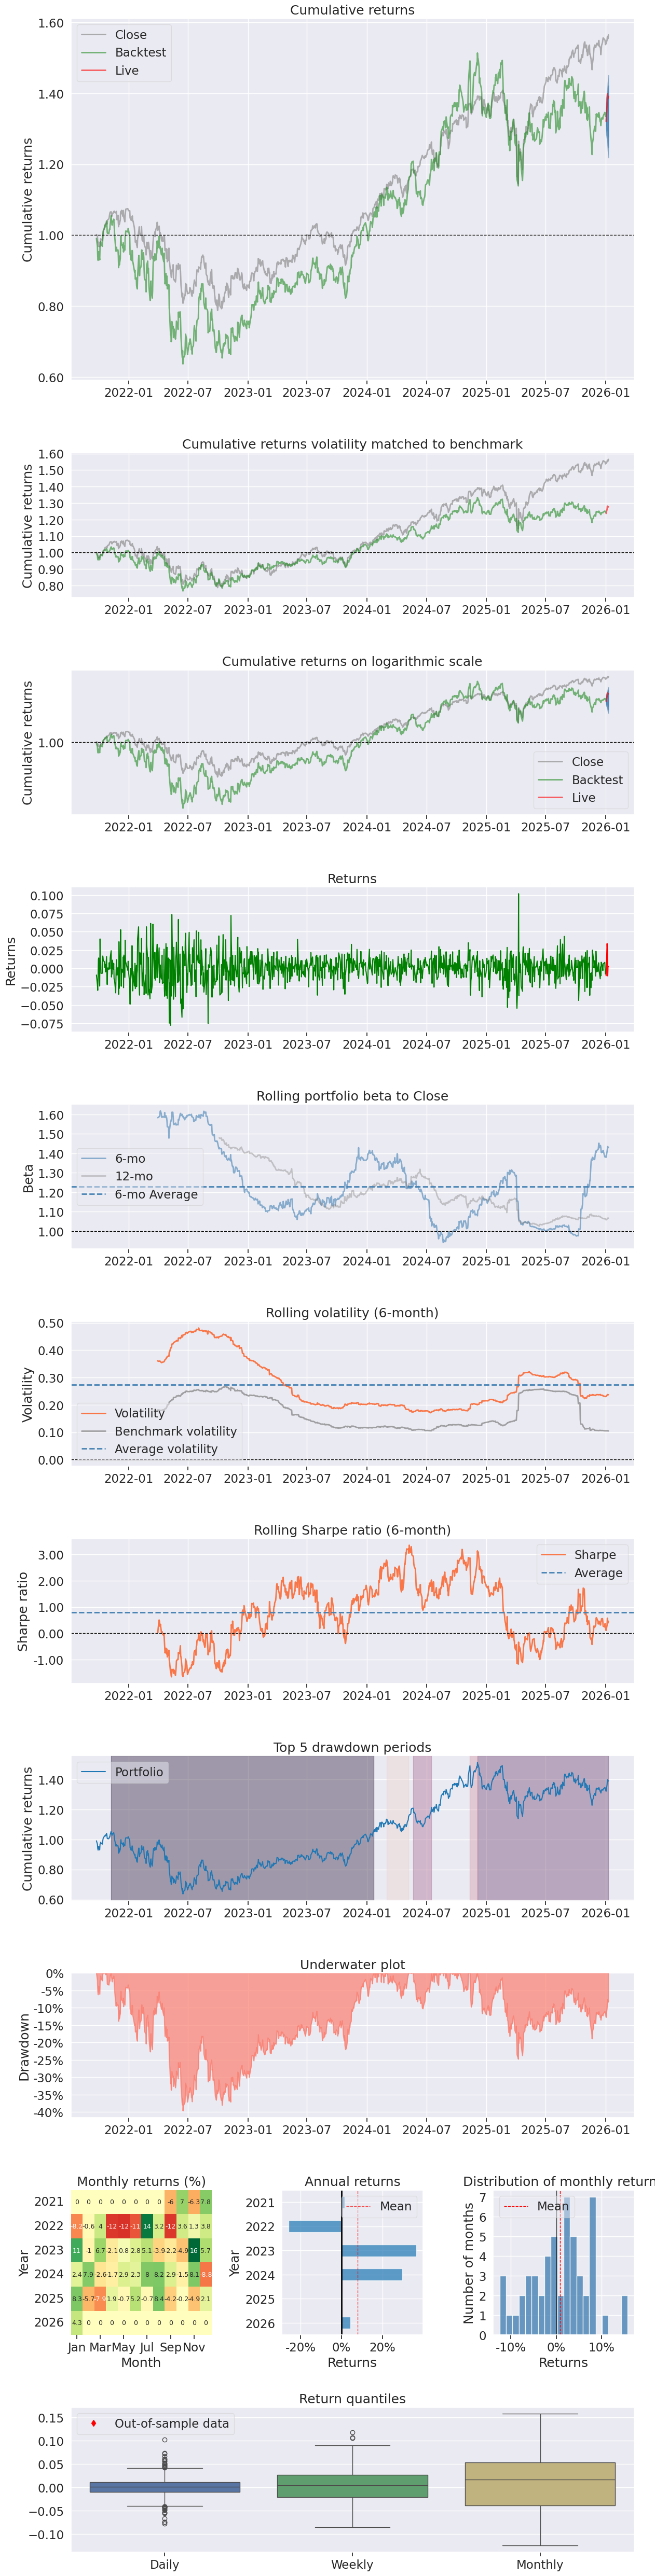

In [26]:
## Create returns tear sheet (set the date of purchase / interest)
pf.create_returns_tear_sheet(returns, live_start_date='2026-01-01', benchmark_rets=bench_returns)